Data Processing:

a) import

b) parse (convert strings to ints)

c) organize (set up database or pandas DataFrame)

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from math import sqrt


fitbit_df = pd.read_csv('FitbitsAndGradesData_Fall2017.csv')
brfss = pd.read_csv('BRFSS_Physical_Acticity.csv')

Conclusion 1: Using FitBit data

NOTE: For Gender 0 is men and 1 is women  AND for Mode 0 is walk and 1 is run for the cardio
The columns are, for the most part, in a great order relative to each other; however, we decided to move Mode next to Cardio to logically show the type of cardio being done. The dataset has 11 features that all relate directly to the exercise habits of the interviewed subjects.

Question: Is the average GPA for for runners less than or equal to those who walked, or is it strictly higher?

Null hypothesis: Average GPA for runners will be less than or equal to the walkers

Alternative hypothesis: Average GPA for runners will be greater than the walkers

We are fairly confident so a significance of .02 will be used; confidence level 98%

n=581

Analysis of GPA relative to cardio mode chosen/used using T test.
Median value is red line and mean is the tip of the green arrow.


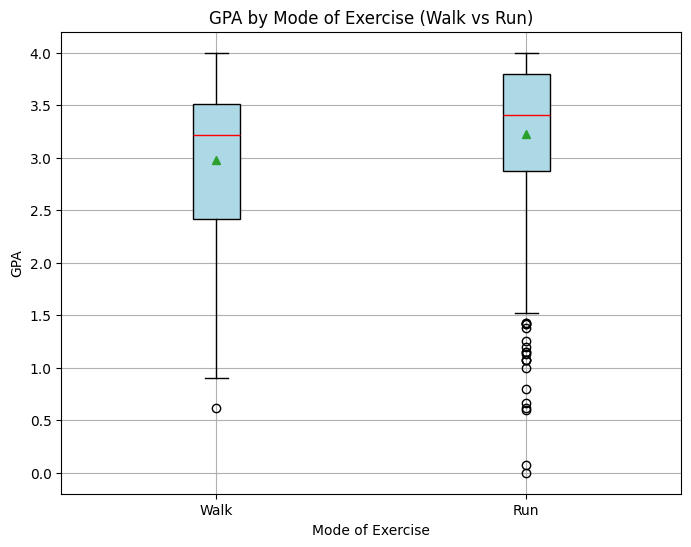

T-statistic: 2.703
p-value (H₁: runners > walkers): 0.0040
As seen, the p value is less than the significance level(.02) such that we can reject the Null.
We can conclude that the average GPA for runners is actually greater than that of
the walkers


In [2]:
fitBitData = pd.read_csv('FitbitsAndGradesData_Fall2017.csv')
fitBitData = fitBitData[['Key', 'Steps', 'Peak', 'Cardio', 'Mode', 'FatBurn', 'Minutes',
                         'Gender', 'Age', 'GPA', 'Life Score']]

print("Analysis of GPA relative to cardio mode chosen/used using T test.")
print("Median value is red line and mean is the tip of the green arrow.")
gpaWalk = fitBitData[fitBitData['Mode'] == 0]['GPA']
gpaRun = fitBitData[fitBitData['Mode'] == 1]['GPA']

plt.figure(figsize=(8, 6))
plt.boxplot([gpaWalk, gpaRun], patch_artist=True,showmeans=True,
            boxprops=dict(facecolor='lightblue'),
            medianprops=dict(color='red'))


plt.xticks([1, 2], ['Walk', 'Run'])
plt.title('GPA by Mode of Exercise (Walk vs Run)')
plt.xlabel('Mode of Exercise')
plt.ylabel('GPA')
plt.grid(True)
plt.show()





tValue, pValueTwoSample = stats.ttest_ind(gpaRun, gpaWalk, equal_var=False)

if tValue > 0:
    pValueTwoSample = pValueTwoSample / 2
else:
    pValueTwoSample = 1 - (pValueTwoSample / 2)

print(f"T-statistic: {tValue:.3f}")
print(f"p-value (H₁: runners > walkers): {pValueTwoSample:.4f}")
print("As seen, the p value is less than the significance level(.02) such that we can reject the Null.")
print("We can conclude that the average GPA for runners is actually greater than that of")
print("the walkers")




**Conclusion 2: Using FitBit data**
Question: Do women have higher GPA's on average?

Null hypothesis: There is no significant difference between the average gpa of female students and the average gpa of the population

Alernative hypothesis: The average GPA based on gender is not equal. (There is significant difference)

Z-test comparing the sample GPA of women at the university vs the entire dataset

In [3]:
# Sample mean (GPA for women)
xbar = fitBitData[fitBitData['Gender'] == 1]['GPA'].mean()
print(f'sample mean: {xbar}')
# Sample size (# of women)
n = len(fitBitData[fitBitData['Gender'] == 1]['GPA'])
print(f'sample size: {n}')

# Population Mean
mu = fitBitData['GPA'].mean()
print(f'population mean: {mu}')
# Population std dev
sigma = fitBitData['GPA'].std()
print(f'population std dev: {sigma}')
# Alpha (Significance) Level
alpha = 0.05

# Z-score
z = (xbar - mu) / (sigma / sqrt(n))
# Total Tail Area (p-value)
twoTail = 2 * (1 - stats.norm.cdf(abs(z)))

print(f'z-score: {z}')
print(f'p-value {twoTail}')

if twoTail <= alpha:
  print(f'Rejection of H0: There is a significant difference between means')
else:
  print(f'Fail to Reject H0: Average GPA is equivalent between women and population')

sample mean: 3.2782848837209304
sample size: 344
population mean: 3.186919104991394
population std dev: 0.7577477803445738
z-score: 2.236341425101386
p-value 0.0253294148780987
Rejection of H0: There is a significant difference between means


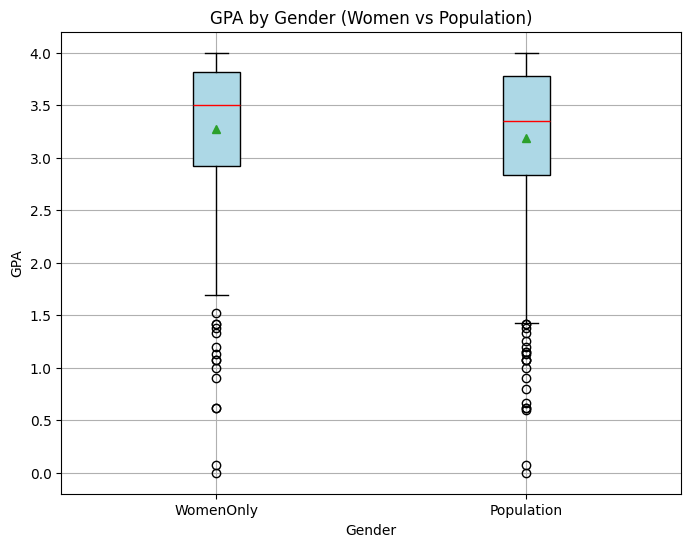

In [4]:
gpaWomen = fitBitData[fitBitData['Gender'] == 1]['GPA']
gpaAll = fitBitData['GPA']
plt.figure(figsize=(8, 6))
plt.boxplot([gpaWomen, gpaAll], patch_artist=True,
            boxprops=dict(facecolor='lightblue'),
            medianprops=dict(color='red'), showmeans=True)

plt.xticks([1, 2], ['WomenOnly', 'Population'])
plt.title('GPA by Gender (Women vs Population)')
plt.xlabel('Gender')
plt.ylabel('GPA')
plt.grid(True)
plt.show()

**Conclusion 3: Using BRFSS Data**

*Question:*
Are people more likely to meet aerobic guidelines than strength training guidelines in 2017?

*Null hypothesis:*
People are equally likely to meet aerobic and strength guidelines in 2017. (There is no difference)

*Alernative hypothesis:*
People are more likely to meet aerobic guidelines than strength guidelines in 2017. (There is significant difference)

Analysis of amount of people meeting aerobic guidelines vs strength training guidlines in 2017 using **Chi-squared test**.

In [5]:
from scipy.stats import chi2_contingency

brfss_2021 = brfss[brfss['year']== 2017].iloc[0]

data = {
    'Activity': ['Aerobic', 'Aerobic', 'Strength', 'Strength'],
    'Meet_Guidelines': ['Yes', 'No', 'Yes', 'No'],
    'count': [
        brfss_2021['PAINDX2_yes_value'],
        brfss_2021['PAINDX2_no_value'],
        brfss_2021['PASTRNG_yes_value'],
        brfss_2021['PASTRNG_no_value']
    ]
}

brfss_counts = pd.DataFrame(data)

contingency_table = pd.crosstab(brfss_counts['Activity'],
                                brfss_counts['Meet_Guidelines'],
                                values = brfss_counts['count'],
                                aggfunc='sum')
print("Contingency Table:\n")
print(contingency_table.to_string(index=True))

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-square statistic: {chi2}")
print(f"\nP-value: {p_value}")
print(f"\nDegrees of freedom: {dof}")
print(f"\nExpected frequencies: {expected}")

alpha = 0.05

if p_value < alpha:
  print("\nReject null hypothesis. There is a significant difference in participation between aerobic and strength training.")
else:
  print("\nFail to reject null hypothesis. There is no significant difference in participation between aerobic and strength training.")


Contingency Table:

Meet_Guidelines    No   Yes
Activity                   
Aerobic          57.2  42.8
Strength         74.0  26.0

Chi-square statistic: 5.531232274532046

P-value: 0.018679944835576587

Degrees of freedom: 1

Expected frequencies: [[65.6 34.4]
 [65.6 34.4]]

Reject null hypothesis. There is a significant difference in participation between aerobic and strength training.


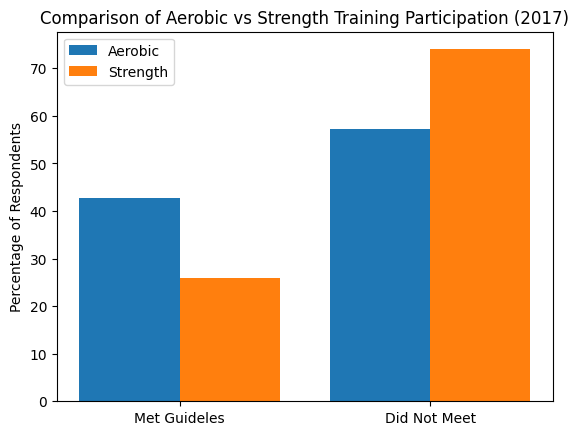

In [6]:
#Plot
labels = ['Met Guideles', 'Did Not Meet']
aerobic = [42.8, 57.2]
strength = [26, 74]
x = range(len(labels))

plt.bar(x, aerobic, width=0.4, label='Aerobic', align='center')
plt.bar([i+0.4 for i in x], strength, width = 0.4, label='Strength', align='center')

plt.xticks([i+0.2 for i in x], labels)
plt.ylabel('Percentage of Respondents')
plt.title('Comparison of Aerobic vs Strength Training Participation (2017)')
plt.legend()
plt.show()